In [1]:
import xarray as xr
import matplotlib.pyplot as plt

# Open the Zarr store
ds_no_hw_zarr = xr.open_zarr('/Trex/case_results/i.e215.I2000Clm50SpGs.hw_production.02/research_results/zarr/NO_HW')


In [2]:

# Load the Q2M variable
q2m = ds_no_hw_zarr['Q2M']


In [4]:
q2m

<xarray.DataArray 'Q2M' (time: 262800, lat: 192, lon: 288)> Size: 58GB
dask.array<open_dataset-Q2M, shape=(262800, 192, 288), dtype=float32, chunksize=(2232, 96, 144), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 768B -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon      (lon) float32 1kB 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) datetime64[ns] 2MB 1985-01-01 ... 2014-12-31T23:00:00
Attributes:
    cell_methods:  time: mean
    long_name:     2m specific humidity
    units:         kg/kg

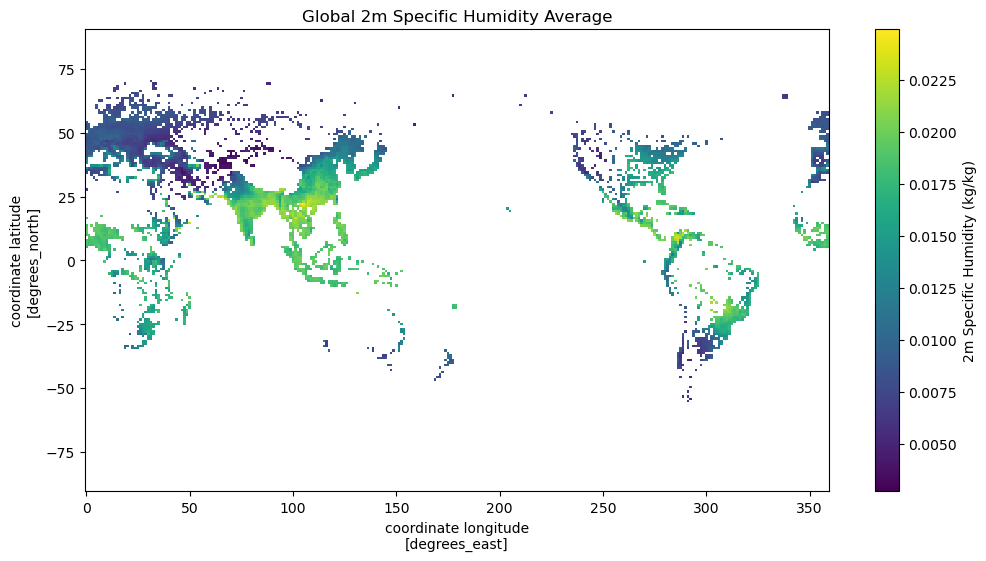

In [3]:

# Compute the average value over time
q2m_mean = q2m.mean(dim='time')


In [5]:
q2m_mean

<xarray.DataArray 'Q2M' (lat: 192, lon: 288)> Size: 221kB
dask.array<mean_agg-aggregate, shape=(192, 288), dtype=float32, chunksize=(96, 144), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 768B -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon      (lon) float32 1kB 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8

In [8]:
df_one_var = q2m_mean.to_dataframe().reset_index()
df_one_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55296 entries, 0 to 55295
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lat     55296 non-null  float32
 1   lon     55296 non-null  float32
 2   Q2M     4241 non-null   float32
dtypes: float32(3)
memory usage: 648.1 KB


In [ ]:
def normalize_longitude(lons):
    """
    Normalize longitudes to be within the range [-180, 180].
    """
    normalized_lons = np.where(lons > 180, lons - 360, lons)
    return normalized_lons

In [15]:
def draw_map_subplot(data, title):
    fig, ax = plt.subplots(figsize=(10, 6), dpi=300)  # Adjust figure size and DPI for high resolution
    if data.empty:
        print(f"No data available for {title}. Skipping plot.")
        ax.set_title(title + " - No Data Available")
        return

    m = Basemap(projection='cyl', lon_0=0, ax=ax,
                fix_aspect=False,
                llcrnrlat=-90, urcrnrlat=90,
                llcrnrlon=-180, urcrnrlon=180)
    m.drawcoastlines(color='0.15', linewidth=0.5, zorder=3)
    m.drawcountries(linewidth=0.1)
    m.fillcontinents(color='white', lake_color='lightcyan')
    m.drawmapboundary(fill_color='lightcyan')
    m.drawparallels(np.arange(-90., 91., 30.), labels=[1, 0, 0, 0], fontsize=10)
    m.drawmeridians(np.arange(-180., 181., 60.), labels=[0, 0, 0, 1], fontsize=10)

    normalized_lons = normalize_longitude(data['lon'].values)
    x, y = m(normalized_lons, data['lat'].values)

    # Dynamically set color map limits based on the data
    vmin, vmax = data['Q2M'].min(), data['Q2M'].max()
    sc = m.scatter(x, y, c=data['Q2M'], cmap='coolwarm', marker='o', edgecolor='none', s=10, alpha=0.75, vmin=vmin, vmax=vmax)
    plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.02)
    ax.set_title(title)
    plt.show()



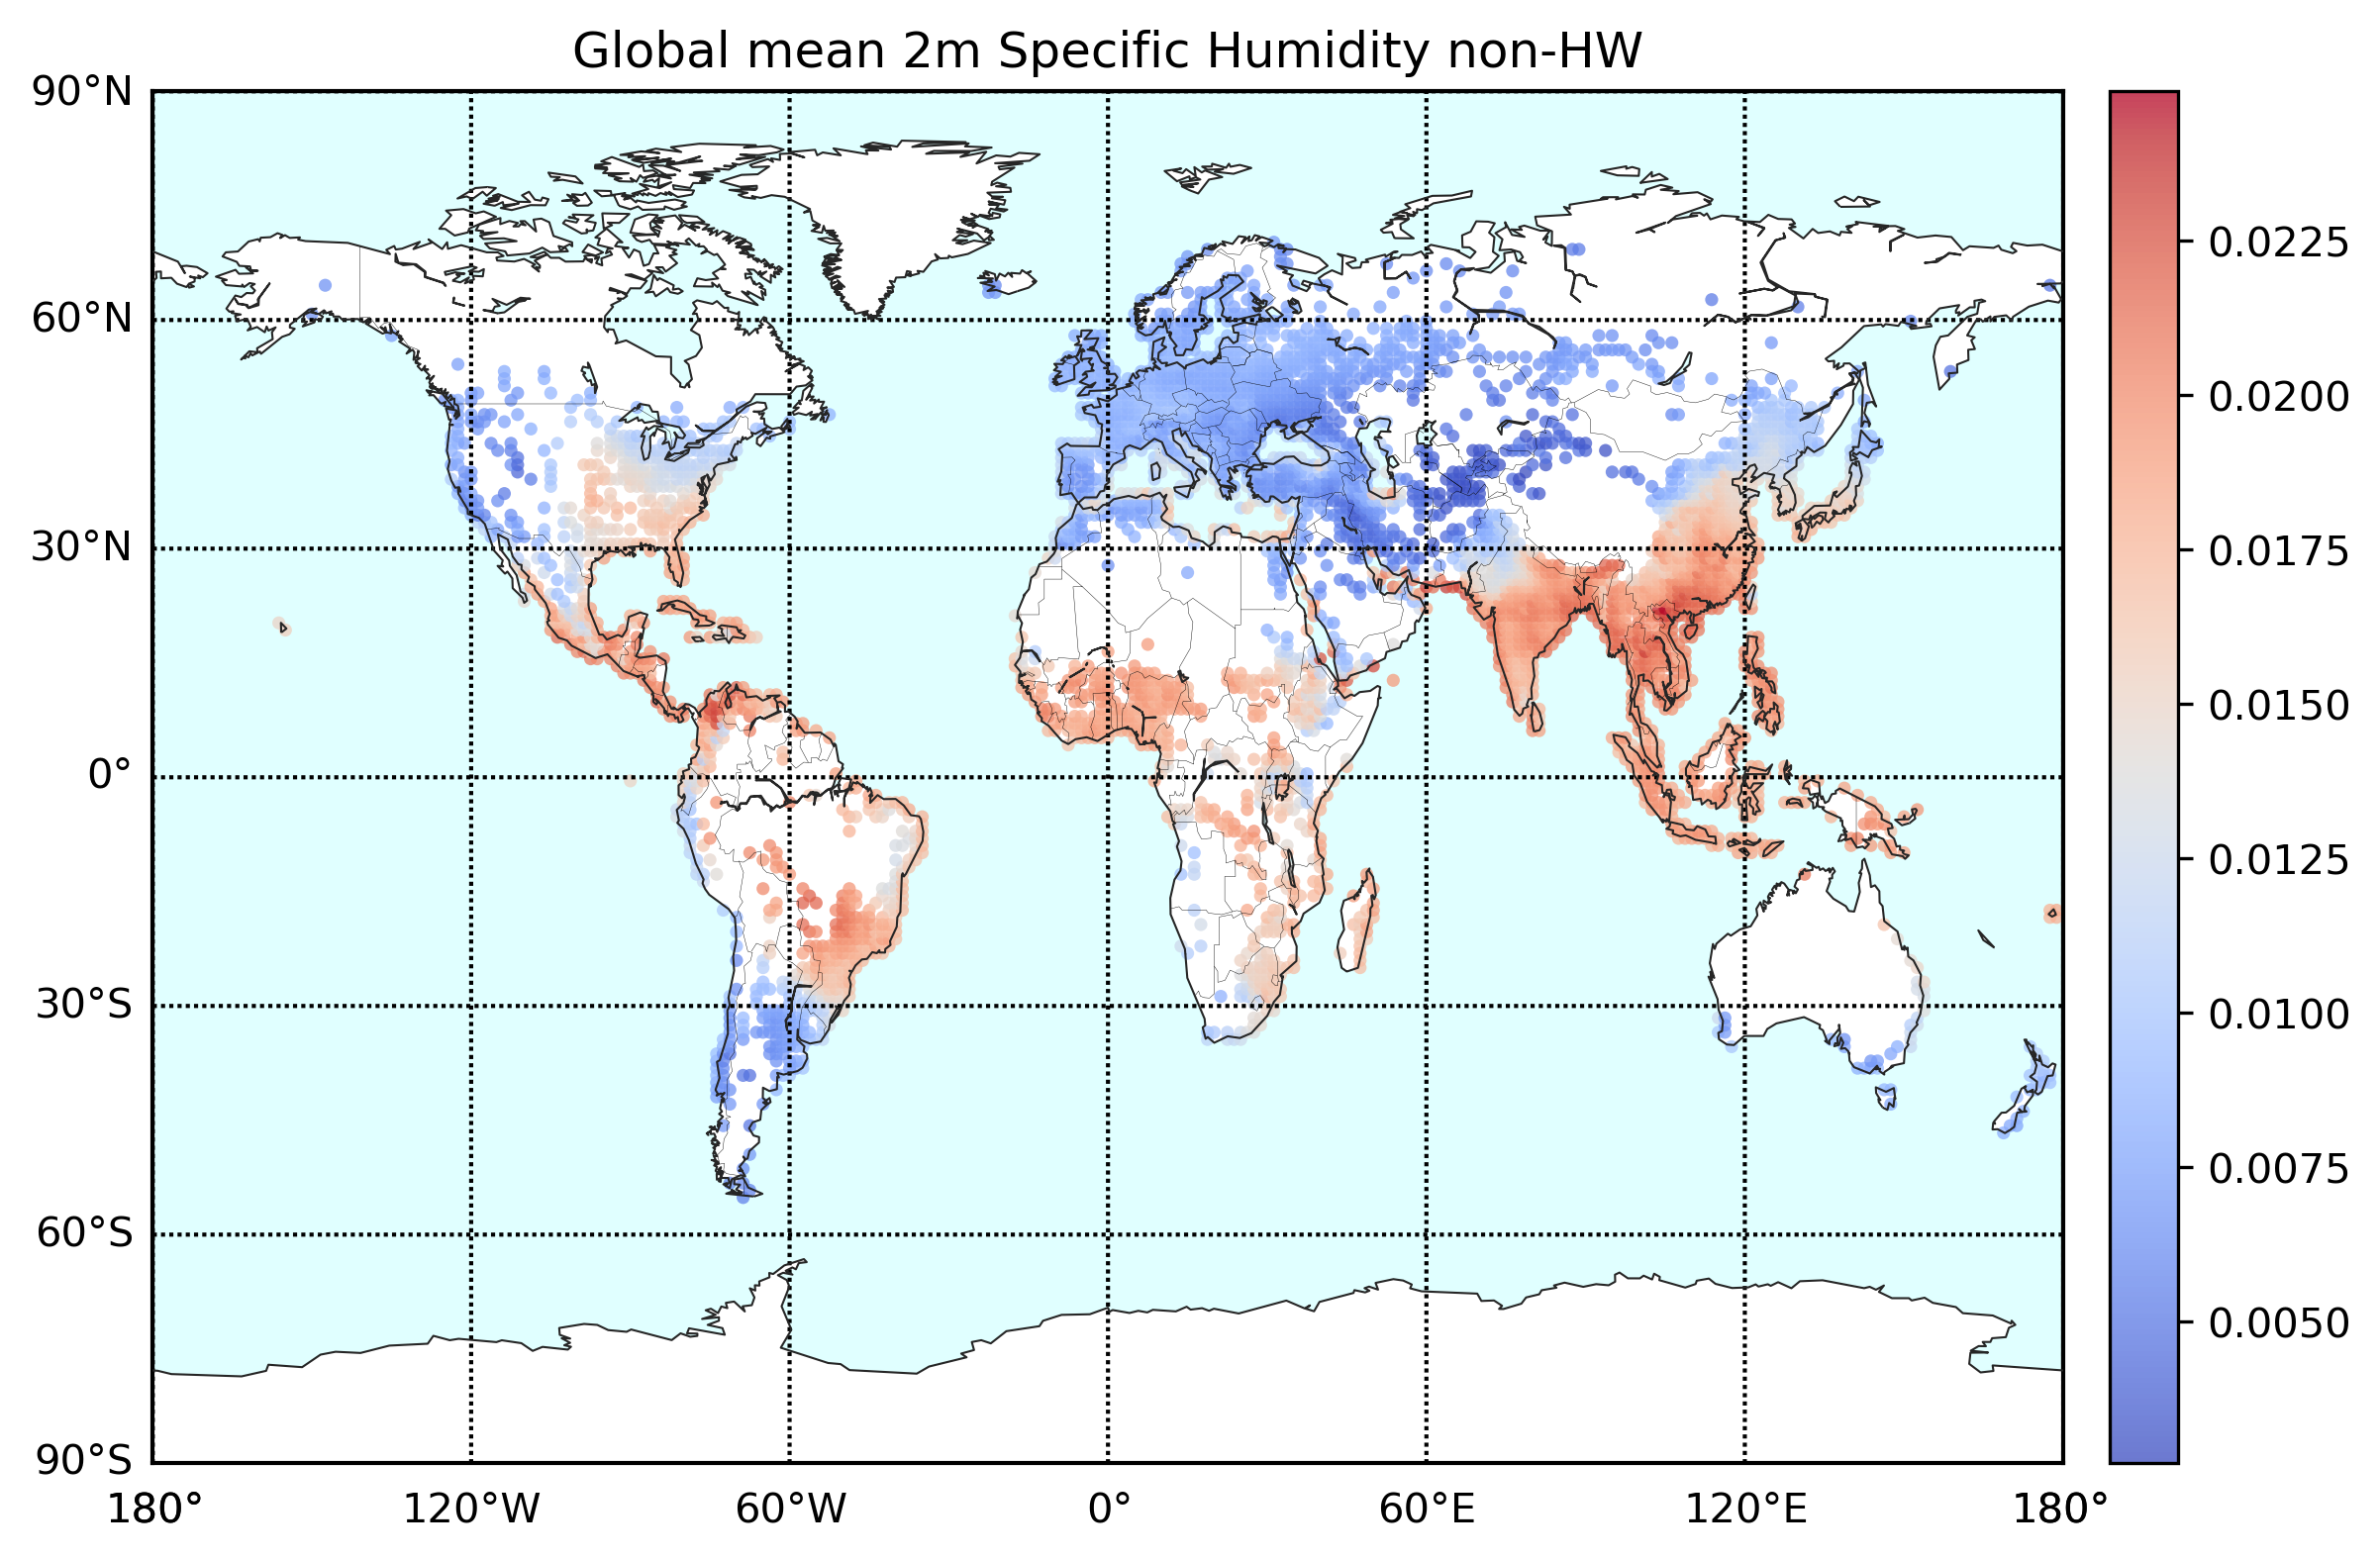

In [18]:
draw_map_subplot(df_one_var, "Global mean 2m Specific Humidity non-HW")